In [2]:
from scipy import optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
# import pylab as pl

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100

In [3]:
df = pd.read_csv(r'ticker_data.csv')

In [54]:
df[df['ticker']=='OR']

,Unnamed: 0,ticker,date,pos,neg,neu,compound
14112,14112,OR,2021-09-29,0.028,0.134,0.839,-0.8793
14113,14113,OR,2021-09-29,0.355,0.000,0.645,0.5106
14114,14114,OR,2021-09-29,0.086,0.091,0.822,-0.3839
14115,14115,OR,2021-09-29,0.000,0.202,0.798,-0.7645
14116,14116,OR,2021-09-29,0.065,0.101,0.833,-0.2023
14117,14117,OR,2021-09-29,0.067,0.155,0.778,-0.3098
14118,14118,OR,2021-09-29,0.000,0.051,0.949,-0.3818
14119,14119,OR,2021-09-29,0.173,0.014,0.813,0.9370
14120,14120,OR,2021-09-29,0.000,0.087,0.913,-0.2960
14121,14121,OR,2021-09-29,0.074,0.000,0.926,0.3400


In [21]:
#ticker is name of ticker
#date is date of mention on reddit, string YYYY-MM-DD
#pos, neg, neu`

#comound is normalized sum of others

In [4]:
df2 = pd.read_csv(r'stock_data.csv')

In [5]:
df2.drop(["open", 'high', 'low', 'adj close', 'volume'], axis=1, inplace=True)

In [53]:
df2[df2['ticker']=='OR']

,Date,Close,ticker,change
22486,2021-09-15,12.21,OR,7.850000
22487,2021-09-16,11.97,OR,-0.240000
22488,2021-09-17,11.83,OR,-0.140000
22489,2021-09-20,11.75,OR,-0.080000
22490,2021-09-21,11.78,OR,0.030000
...,...,...,...,...
22616,2022-03-22,13.07,OR,-0.160000
22617,2022-03-23,13.31,OR,0.240001
22618,2022-03-24,13.30,OR,-0.010000
22619,2022-03-25,13.23,OR,-0.070001


In [11]:
df2['change'] = df2['close'].diff()

In [7]:
df[df['ticker']=='OR']['compound']

14112   -0.8793
14113    0.5106
14114   -0.3839
14115   -0.7645
14116   -0.2023
14117   -0.3098
14118   -0.3818
14119    0.9370
14120   -0.2960
14121    0.3400
14122    0.8029
14123   -0.0121
14124    0.8847
14125   -0.4943
14126    0.0000
14127   -0.4703
14128    0.2617
14129    0.3164
14130    0.7738
14131    0.5095
14132    0.1027
17209   -0.1708
17210    0.9578
17211    0.8831
17212   -0.7734
17213   -0.1646
17214    0.9047
17215    0.0436
27214   -0.1805
27215   -0.7339
27216    0.2263
27217    0.7269
27218    0.6808
27219    0.6072
27220   -0.8689
27221   -0.3028
27222    0.4523
27223   -0.5927
27224    0.0000
27225    0.6406
27226   -0.4404
27227    0.0000
27228    0.8313
27229    0.3182
27230   -0.1366
27231    0.4404
27232    0.4767
Name: compound, dtype: float64

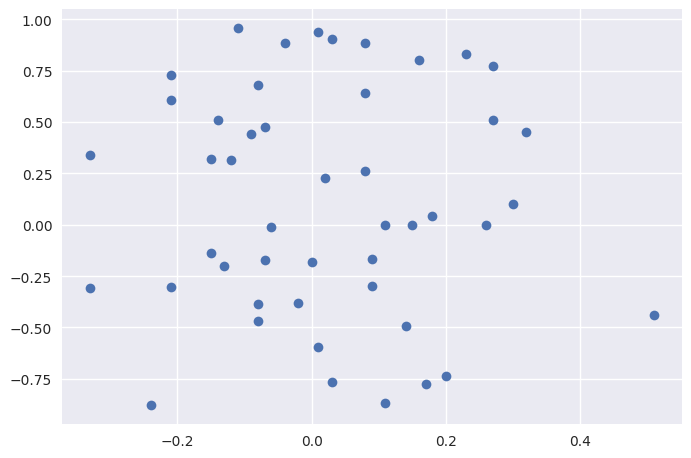

In [9]:
plt.plot(df2[df2['ticker']=='OR']['change'][1:48], df[df['ticker']=='OR']['compound'], 'o')

In [32]:
plt df2.groupby('ticker')

In [38]:
df2.loc[df['ticker']=='AA','change']

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
df['date'].max()

In [6]:
df['date'].min()

'2021-04-22'

In [7]:
grouped = df.groupby('ticker')['date']
maxes = grouped.max()
mins = grouped.min()

In [8]:
len(maxes)

503

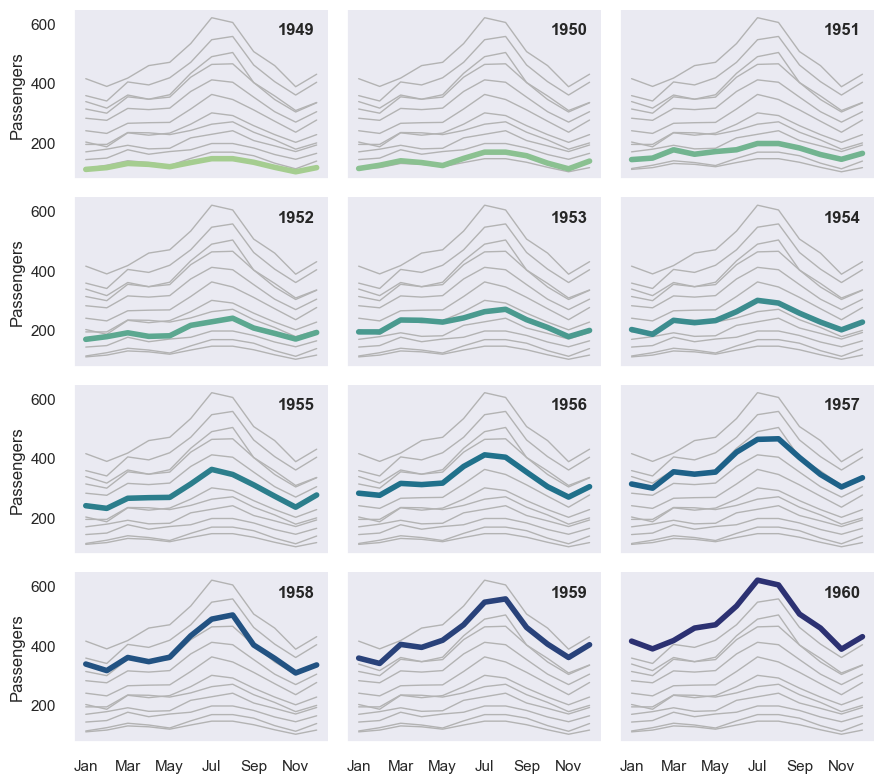

In [13]:
import seaborn as sns

sns.set_theme(style="dark")
flights = sns.load_dataset("flights")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=flights,
    x="month", y="passengers", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=flights, x="month", y="passengers", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout()

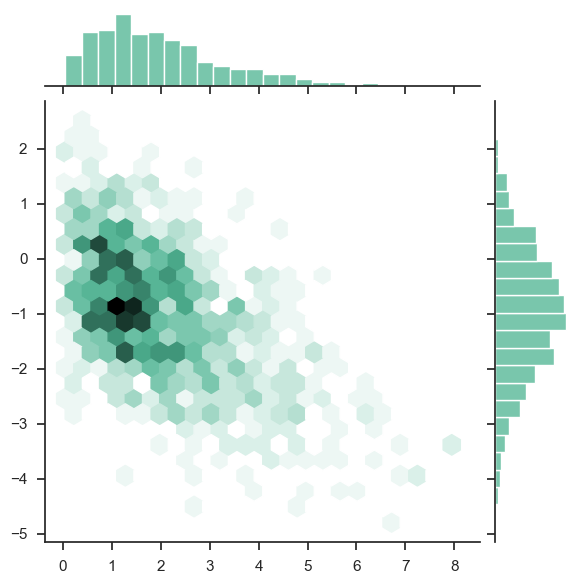

In [61]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

#rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

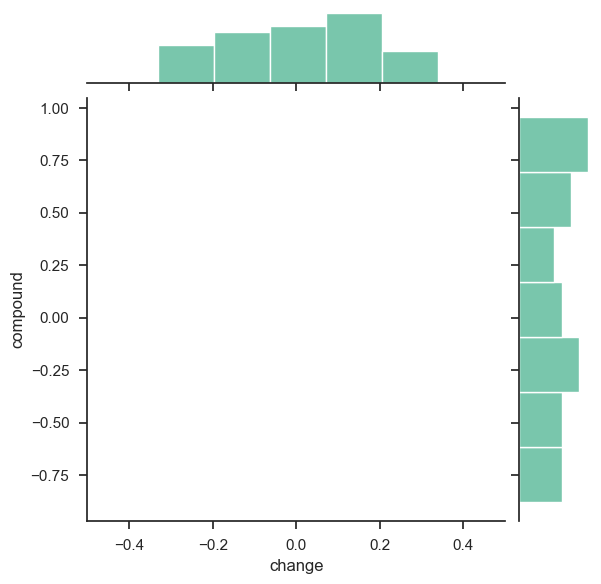

In [82]:
import numpy as np
import seaborn as sns
#sns.set_theme(style="ticks")

#rs = np.random.RandomState(11)
x = df2[df2['ticker']=='OR']['change'][0:40] 
y = df[df['ticker']=='OR']['compound'][0:40]

sns.jointplot(x=x, y=y, color="#4CB391", xlim = [-.5,.5], kind = 'scatter')

<AxesSubplot:>

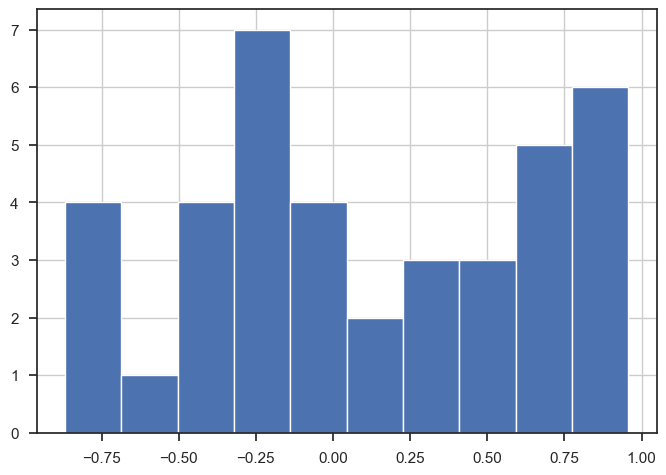

In [64]:
df[df['ticker']=='OR']['compound'][1:40].hist()

<AxesSubplot:>

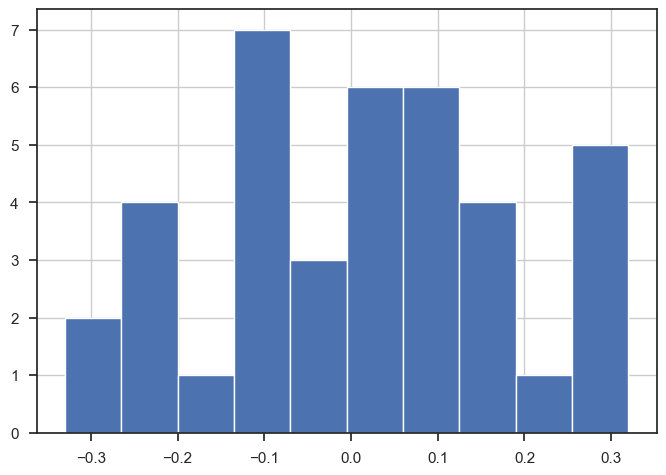

In [67]:
df2[df2['ticker']=='OR']['change'][1:40].hist()

In [14]:
np.array(df[df['ticker']=='OR']['compound'])
np.array(df2[df2['ticker']=='OR']['change'])

array([ 7.8499999 , -0.23999977, -0.14000034, -0.07999992,  0.02999973,
       -0.13000011, -0.32999992, -0.0199995 ,  0.01000023,  0.0899992 ,
       -0.32999992,  0.15999985, -0.05999947,  0.07999992,  0.14000034,
        0.25999928, -0.07999992,  0.07999992, -0.11999989,  0.27000046,
        0.2699995 ,  0.30000019, -0.06999969, -0.11000061, -0.03999996,
        0.17000008,  0.09000015,  0.02999973,  0.18000031,  0.        ,
        0.19999981,  0.02000046, -0.21000004, -0.07999992, -0.21000004,
        0.10999966, -0.21000004,  0.32000065,  0.00999928,  0.11000061,
        0.07999992,  0.51000023,  0.14999962,  0.22999954, -0.14999962,
       -0.14999962, -0.09000015, -0.07000065, -0.19999981, -0.28999996,
       -0.05999947, -0.14000034, -0.17000008, -0.11999989, -0.52000046,
       -0.47999954, -0.01000023,  0.27999973,  0.24000072,  0.05999947,
       -0.31999969,  0.11999989, -0.13000011, -0.25      ,  0.02999973,
        0.46000004, -0.07999992, -0.02999973,  0.10999966,  0.17

In [21]:
def xcorr(sent_df, ticker_df, ticker, lag):
    '''Lag is in units of days. 
    
       sent_df should have 'ticker', 'date', and 'compound' columns
       ticker_df should have 'ticker', 'Date', and 'change' columns
    
       This should work for lag of -9 to 9,
       but doesn't. Use with caution. '''
    def strptime(timestr):
        return time.mktime(time.strptime(timestr, "%Y-%m-%d"))
    def strftime(timesec):
        return time.strftime("%Y-%m-%d", time.time(timesec))
    
    if lag < -13 or lag > 14:
        raise Exception('Must have -9 <= lag <= 10')
    
#     print(sent_df[sent_df['ticker']==ticker])
#     print(ticker_df[ticker_df['ticker']==ticker])
#     joined = sent_df[sent_df['ticker']==ticker].set_index('date').join(
#         ticker_df[ticker_df['ticker']==ticker].set_index('date'), how='inner', lsuffix='_')
#     print(joined)
#     raise Exception()
        
    sent_dates = np.array(list(strptime(x) for x in sent_df[sent_df['ticker']==ticker]['date']))
    # remove first data point since the 'change' is invalid
    ticker_dates = np.array(list(strptime(x) for x in ticker_df[ticker_df['ticker']==ticker]['date'][1:]))
    sent_data = np.array(sent_df[sent_df['ticker']==ticker]['compound'])
    ticker_data = np.array(ticker_df[ticker_df['ticker']==ticker]['change'][1:])
    
    sent_order = np.argsort(sent_dates)
    ticker_order = np.argsort(ticker_dates)
    
    sent_dates = sent_dates[sent_order]
    sent_data = sent_data[sent_order]
    ticker_dates = ticker_dates[ticker_order]
    ticker_data = ticker_data[ticker_order]
    
    tot = 0
    for i in range(len(sent_dates)):
        i2 = np.where(ticker_dates == sent_dates[i])[0][0]+lag
        tot += sent_data[i]*ticker_data[i2]
    return tot
for i in range(-9,10,1):
    print(i)
    print(xcorr(df, df2, 'AA', i))

-9
-0.73065
-8
0.49197018241882323
-7
0.3994218513488769
-6
0.5504235202789306
-5
0.6380998107910122
-4
-0.2679046283721889
-3
0.14125944595336914
-2
0.7014233310699497
-1
-0.33609833106994974
0
0.05845147972106933
1
0.46761555404663085
2
-0.7062935134887695
3
-0.11690481758117675
4
-0.4237764797210693
5
1.0131670337676968
6
-0.07306388511657369
7
-0.8134579662322997
8
-0.23380777702331543
9


IndexError: index 18 is out of bounds for axis 0 with size 18

In [ ]:
coins = []